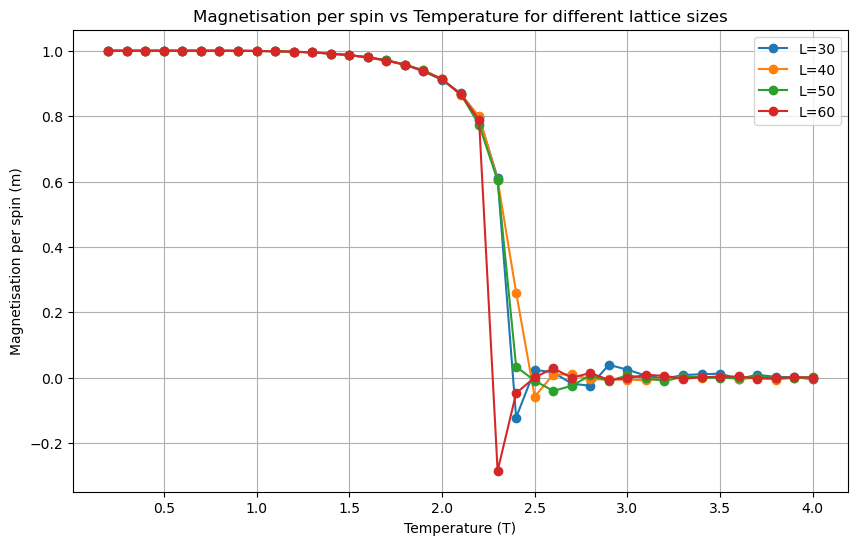

In [1]:

import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
from numba import njit # python libary used to speed up computations

@njit
def metropolis_sweep_ising_2D(spins, T): # 2d Ising Model sweep
    """ Implementing Metropolis algorithm for Ising Model in 2D """
    L = spins.shape[0]
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        delta_E = 2.0 * spins[i, j] * (
            spins[(i + 1) % L, j] +
            spins[(i - 1) % L, j] +
            spins[i, (j + 1) % L] +
            spins[i, (j - 1) % L]
        )
        if delta_E <= 0.0 or np.random.uniform(0, 1) < np.exp(-delta_E / T):
            spins[i, j] *= -1

@njit
def magnetic_moment_ising_2D(spins):
    
    S = 0.0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[1]):
            S += spins[i, j]
    return S

relax_sweeps = 500
sweeps = 2000

temperatures = np.arange(0.2, 4.1, 0.1)

sizes = [30, 40, 50, 60]  # List of lattice sizes to simulate (also given)

plt.figure(figsize=(10, 6))

for L in sizes:  # Loop over sizes
    N = L * L
    magnetisation_T = []

    for T in temperatures:
        spins = np.ones((L, L))
        magnetic_moment_sweep = []

        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_2D(spins, T)
            if sweep >= relax_sweeps:
                magnetic_moment_sweep.append(magnetic_moment_ising_2D(spins) / N)

        magnetisation_T.append(np.mean(magnetic_moment_sweep))

    plt.plot(temperatures, magnetisation_T, "-o", label=f'L={L}')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetisation per spin (m)')
plt.title('Magnetisation per spin vs Temperature for different lattice sizes')
plt.legend()
plt.grid(True)
plt.show()


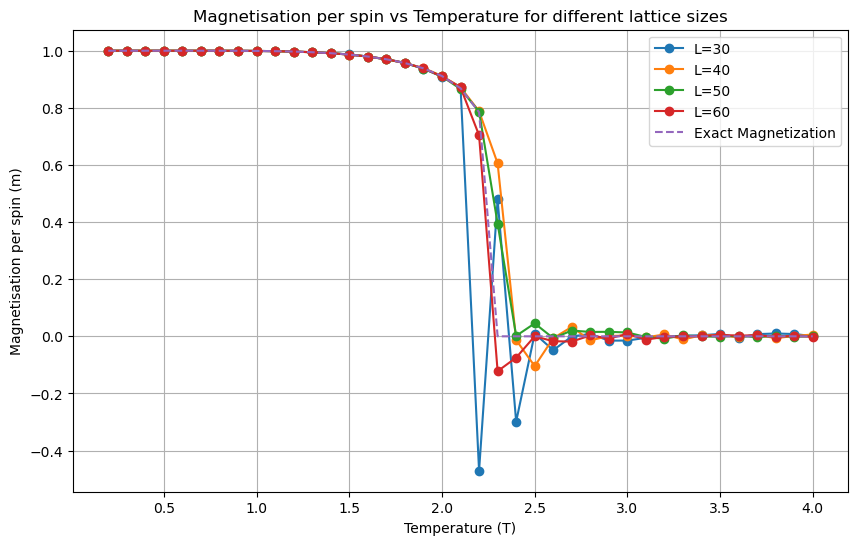

In [2]:
# To plot the mathematically exact magnetization per spin alongside the simulation results,
# we modify the code to include the exact formula for magnetization per spin. 

@njit
def metropolis_sweep_ising_2D(spins, T):
    """ Implementing Metropolis algorithm for Ising Model in 2D """
    L = spins.shape[0]
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        delta_E = 2.0 * spins[i, j] * (
            spins[(i + 1) % L, j] +
            spins[(i - 1) % L, j] +
            spins[i, (j + 1) % L] +
            spins[i, (j - 1) % L]
        )
        if delta_E <= 0.0 or np.random.uniform(0, 1) < np.exp(-delta_E / T):
            spins[i, j] *= -1

@njit
def magnetic_moment_ising_2D(spins):
    """ 
    The total magnetisation of the system is obtained by
    implementing equation (10) in Unit 10IM
    """
    S = 0.0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[1]):
            S += spins[i, j]
    return S

# Define exact magnetization function
def exact_magnetization(T):
    Tc = 2.26918
    if T <= Tc:
        return ((1 - np.sinh(2.0 / T)**(-4))**(1/8)) # we are told kb=1 and j=1
    else:
        return 0.0

relax_sweeps = 500
sweeps = 2000

temperatures = np.arange(0.2, 4.1, 0.1)

sizes = [30, 40, 50, 60]  # The same given lattice sizes to simulate

plt.figure(figsize=(10, 6))

for L in sizes:  # Loop over sizes
    N = L * L
    magnetisation_T = []

    for T in temperatures:
        spins = np.ones((L, L))
        magnetic_moment_sweep = []

        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_2D(spins, T)
            if sweep >= relax_sweeps:
                magnetic_moment_sweep.append(magnetic_moment_ising_2D(spins) / N)

        magnetisation_T.append(np.mean(magnetic_moment_sweep))

    plt.plot(temperatures, magnetisation_T, "-o", label=f'L={L}')

# Plot exact magnetization
exact_magnetization_values = [exact_magnetization(T) for T in temperatures]
plt.plot(temperatures, exact_magnetization_values, "--", label='Exact Magnetization')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetisation per spin (m)')
plt.title('Magnetisation per spin vs Temperature for different lattice sizes')
plt.legend()
plt.grid(True)
plt.show()
# This code will now plot both the simulated magnetization per spin and the mathematically exact 
# magnetization per spin on the same graph. The exact magnetization is calculated using the given
# formula for temperatures up to and including the critical temperature, beyond which it is zero.







#### The comparison between the simulation results and the mathematically exact magnetization are: Qualitative Agreement: Generally, we expect qualitative agreement between simulation results and the exact solution. Both curves should exhibit similar trends, such as the onset of magnetization at low temperatures and saturation or decrease in magnetization as temperature increases. Quantitative Discrepancies: There may be discrepancies between the simulation and exact results, especially in regions where finite-size effects become significant. Finite-size effects can lead to deviations from the thermodynamic limit, affecting the accuracy of the simulated magnetization. Critical Behavior: The simulation results should show behavior consistent with critical phenomena, such as the divergence of the correlation length. The comparison with the exact solution can help validate the critical behavior observed in the simulation. Computational Considerations: The computational approach used in the simulation (Monte Carlo methods) may introduce statistical errors, especially at low temperatures where thermalization can be challenging. These errors can affect the accuracy of the simulated magnetization compared to the exact solution. In summary, while the simulation results provide valuable insights into the behavior of the Ising model,especially for finite-size systems, comparing them with the exact solution helps validate the simulation methodology and understand the limitations of finite-size simulations.

In [1]:
%reset -f
# reset python

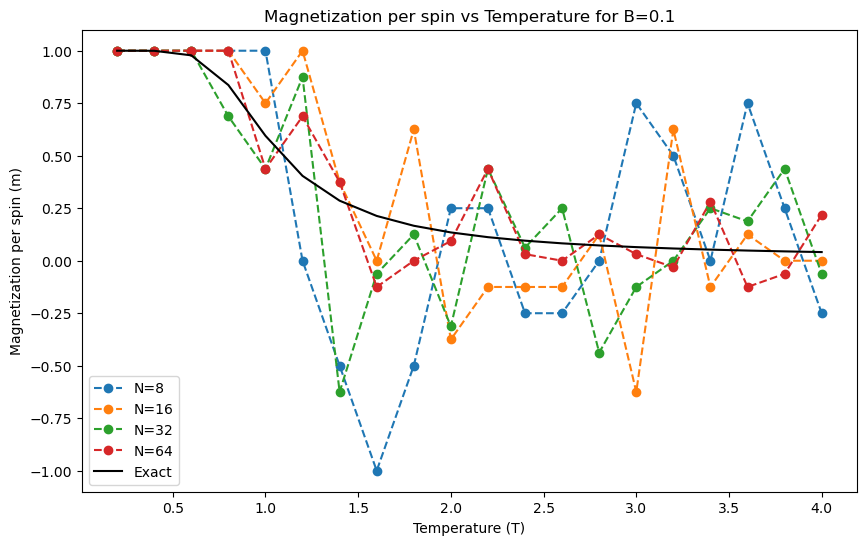

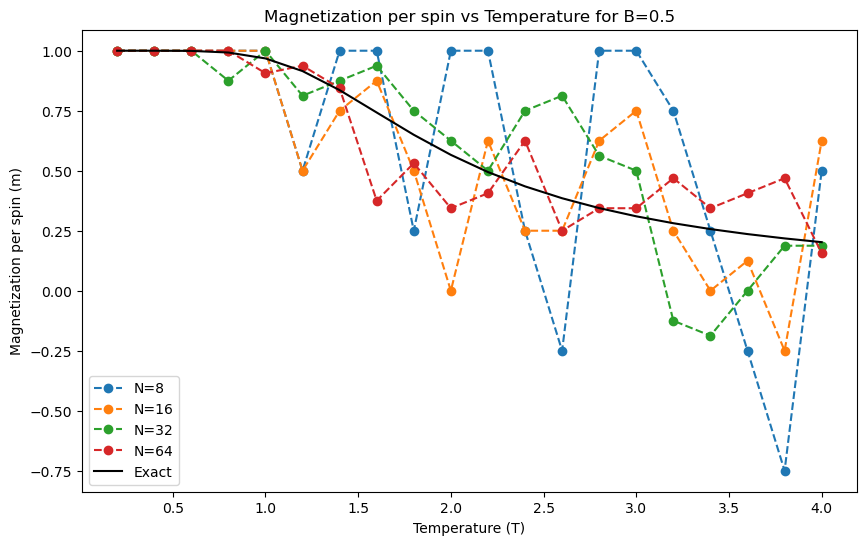

In [3]:

# We'll be plotting the magnetization per spin m versus temperature T for different lattice sizes and for 
# B = 0.1 and B = 0.5, Additionally, we will overlay the mathematically exact magnetization per spin on these plots.
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_1D(spins, T, B):
    N = len(spins)
    for i in np.random.permutation(N):
        DeltaE = 2 * spins[i] * (J * (spins[i - 1] + spins[(i + 1) % N]) + B)
        if np.exp(-DeltaE / T) > np.random.random():
            spins[i] = -spins[i]

@njit
def magnetization_ising_1D(spins):
    return np.sum(spins) / len(spins)

# Simulation parameters
sizes = [8, 16, 32, 64]
temperatures = np.arange(0.2, 4.1, 0.2)
B_values = [0.1, 0.5]
J = 1.0  # Interaction strength
relax_sweeps = 500
sweeps = 1000

# Function to calculate the exact magnetization
def exact_magnetization(T, B, J):
    beta = 1 / T
    numerator = np.sinh(beta * B)
    denominator = np.sqrt(np.cosh(beta * B)**2 - 2 * np.exp(-2 * beta * J) * np.sinh(2 * beta * J))
    return numerator / denominator

for B in B_values:
    plt.figure(figsize=(10, 6))
    for N in sizes:
        magnetizations_T = []
        for T in temperatures:
            spins = np.ones(N)  # Initialize spins in ordered state
            for sweep in range(sweeps + relax_sweeps):
                metropolis_sweep_ising_1D(spins, T, B)
            magnetizations_T.append(magnetization_ising_1D(spins))
        plt.plot(temperatures, magnetizations_T, "--o", label=f'N={N}')
    
    # Theoretical magnetization
    exact_magnetizations = [exact_magnetization(T, B, J) for T in temperatures]
    plt.plot(temperatures, exact_magnetizations, label='Exact', color='black')
    
    plt.xlabel('Temperature (T)')
    plt.ylabel('Magnetization per spin (m)')
    plt.title(f'Magnetization per spin vs Temperature for B={B}')
    plt.legend()
    plt.show()


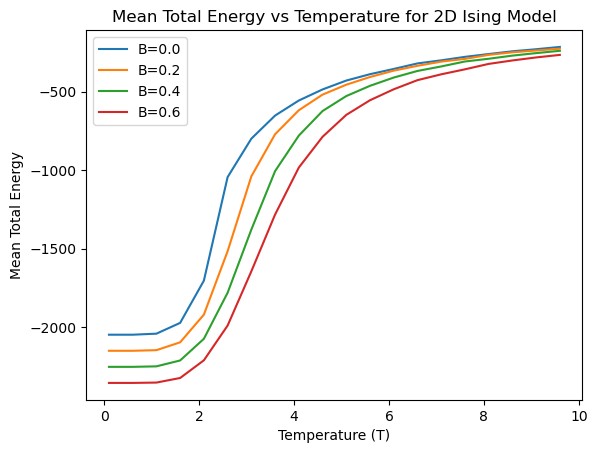

In [6]:

%reset -f

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_2D(spins, T, B):
    N = spins.shape[0]
    for i in range(N * N):
        x = np.random.randint(N)
        y = np.random.randint(N)
        s = spins[x, y]
        nb_sum = spins[(x+1) % N, y] + spins[x, (y+1) % N] + spins[(x-1) % N, y] + spins[x, (y-1) % N]
        DeltaE = 2 * s * (J * nb_sum + B)
        if DeltaE < 0 or np.exp(-DeltaE / T) > np.random.random():
            spins[x, y] = -s

@njit
def total_energy_ising_2D(spins, B):
    N = spins.shape[0]
    E = 0.0
    for i in range(N):
        for j in range(N):
            s = spins[i, j]
            nb_sum = spins[(i+1) % N, j] + spins[i, (j+1) % N] + spins[(i-1) % N, j] + spins[i, (j-1) % N]
            E += -J * s * nb_sum - B * s
    return E / 2  # Because each pair is counted twice

# Simulation parameters
N = 32
temperatures = np.arange(0.1, 10.1, 0.5)
B_values = [0.0, 0.2, 0.4, 0.6]
J = 1.0  # Interaction strength
relax_sweeps = 500
sweeps = 1000

# Perform the simulations
for B in B_values:
    mean_energies = []
    for T in temperatures:
        spins = np.ones((N, N))  # Initialize spins in ordered state
        for sweep in range(relax_sweeps):
            metropolis_sweep_ising_2D(spins, T, B)
        energies = []
        for sweep in range(sweeps):
            metropolis_sweep_ising_2D(spins, T, B)
            energies.append(total_energy_ising_2D(spins, B))
        mean_energies.append(np.mean(energies))
    plt.plot(temperatures, mean_energies, label=f'B={B}')

# Plot the results
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Total Energy')
plt.title('Mean Total Energy vs Temperature for 2D Ising Model')
plt.legend()
plt.show()


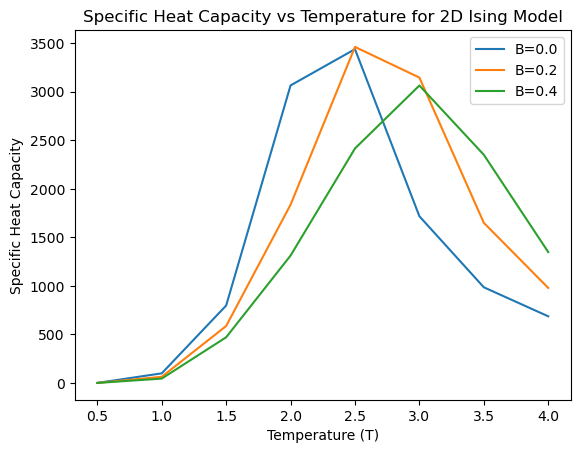

In [7]:

%reset -f
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_2D(spins, T, B):
    N = spins.shape[0]
    for _ in range(N * N):
        x = np.random.randint(N)
        y = np.random.randint(N)
        s = spins[x, y]
        nb_sum = spins[(x+1) % N, y] + spins[x, (y+1) % N] + spins[(x-1) % N, y] + spins[x, (y-1) % N]
        DeltaE = 2 * s * (J * nb_sum + B)
        if DeltaE < 0 or np.exp(-DeltaE / T) > np.random.random(): # generates random numbers between 0 ans 1
            spins[x, y] = -s

@njit
def total_energy_ising_2D(spins, B):
    N = spins.shape[0]
    E = 0.0
    for i in range(N):
        for j in range(N):
            s = spins[i, j]
            nb_sum = spins[(i+1) % N, j] + spins[i, (j+1) % N] + spins[(i-1) % N, j] + spins[i, (j-1) % N]
            E += -J * s * nb_sum - B * s
    return E / 2  # Again because each pair is counted twice

# Simulation parameters
N = 64
temperatures = np.arange(0.5, 4.1, 0.5)
B_values = [0.0, 0.2, 0.4]
J = 1.0  # Interaction strength
relax_sweeps = 500
sweeps = 2000
k_B = 1.0  # Boltzmann constant

# Perform the simulations
for B in B_values:
    specific_heats = []
    for T in temperatures:
        spins = np.ones((N, N))  # Initialize spins in ordered state
        for sweep in range(relax_sweeps):
            metropolis_sweep_ising_2D(spins, T, B)
        energies = []
        energies_squared = []
        for sweep in range(sweeps):
            metropolis_sweep_ising_2D(spins, T, B)
            E = total_energy_ising_2D(spins, B)
            energies.append(E)
            energies_squared.append(E**2)
        mean_E = np.mean(energies)
        mean_E2 = np.mean(energies_squared)
        specific_heat = (mean_E2 - mean_E**2) / (k_B * T**2)
        specific_heats.append(specific_heat)
    plt.plot(temperatures, specific_heats, label=f'B={B}')

# Plot the results
plt.xlabel('Temperature (T)')
plt.ylabel('Specific Heat Capacity')
plt.title('Specific Heat Capacity vs Temperature for 2D Ising Model')
plt.legend()
plt.show()


In [2]:
%reset -f
# reset python

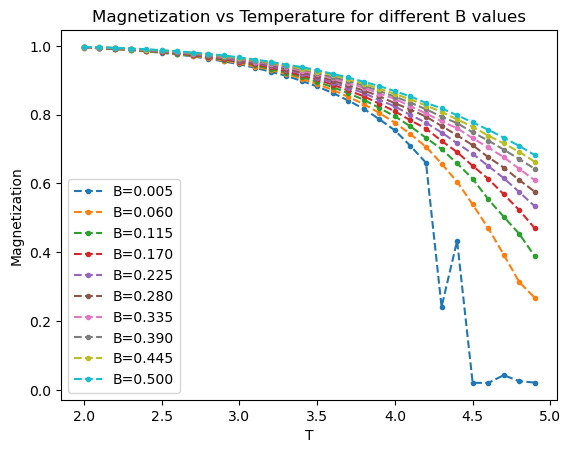

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_3D(spins, T, B):
    """
    Perform a Monte Carlo sweep on a 3D system of spins with magnetic field B.
    """
    L = spins.shape[0]
    for i in np.random.permutation(L):
        for j in np.random.permutation(L):
            for k in np.random.permutation(L):
                DeltaE = 2 * spins[i, j, k] * (
                    spins[i-1, j, k] + spins[(i+1)%L, j, k] +
                    spins[i, j-1, k] + spins[i, (j+1)%L, k] +
                    spins[i, j, k-1] + spins[i, j, (k+1)%L] + B)
                if np.exp(-DeltaE / T) > np.random.random():
                    spins[i, j, k] = -spins[i, j, k]
# Magnetization Calculation Function
@njit
def total_magnetisation_3D(spins):
    """
    Calculate the total magnetisation of the 3D system.
    """
    return np.sum(spins)
#Simulation Parameters
L = 10  # Lattice size
B_values = np.linspace(0.005, 0.5, 10)  # Magnetic field values to simulate
relax_sweeps = 400
sweeps = 2000
temperatures = np.arange(2.0, 5.0, 0.1)  # Temperature range around the expected critical temperature

def run_simulation(L, B_values, relax_sweeps, sweeps, temperatures):
    for B in B_values:
        magnetization_T = []

        for T in temperatures:
            spins = np.ones((L, L, L), dtype=np.int8)
            total_magnetisation_sweep = []

            for sweep in range(sweeps + relax_sweeps):
                metropolis_sweep_ising_3D(spins, T, B)

                if sweep >= relax_sweeps:
                    total_magnetisation_sweep.append(total_magnetisation_3D(spins))

            avg_magnetization = np.mean(total_magnetisation_sweep)
            magnetization_T.append(avg_magnetization / (L**3))

        plt.plot(temperatures, magnetization_T, "--.", label=f'B={B:.3f}')
        plt.xlabel('T')
        plt.ylabel('Magnetization')
        plt.title('Magnetization vs Temperature for different B values')
        plt.legend()

    plt.show()

run_simulation(L, B_values, relax_sweeps, sweeps, temperatures)
# This code initializes a 3D lattice of spins, performs Monte Carlo sweeps using the Metropolis algorithm,
# and calculates the average magnetization. It then plots the magnetization as a function of temperature
# for different values of the external magnetic field 


####  Effect of a Non-zero Magnetic Field on Magnetization By varying B in the range from 0.005 to 0.5 and plotting the magnetization as a function of temperature, we can analyze how an external magnetic field influences the magnetization. We expect the magnetization to be non-zero even above the critical temperature as B increases, reflecting the alignment of spins with the external field.